# Simulación 3D de caída libre con resistencia del aire

**Resumen**

Este proyecto presenta una simulación tridimensional de la caída libre de un objeto, teniendo en cuenta la resistencia del aire. A través de una animación, se visualizará el movimiento del objeto en un entorno 3D a lo largo del tiempo, mostrando cómo la resistencia del aire influye en su trayectoria.

**Introducción**

En esta simulación, se modela la caída libre de un objeto en un espacio tridimensional, considerando la resistencia del aire que actúa en la dirección del movimiento. La animación resultante ilustra la trayectoria del objeto y permite observar cómo la resistencia del aire afecta su desplazamiento.

**Modelo Matemático**

El modelo se basa en la resolución de ecuaciones diferenciales que describen el movimiento del objeto en tres dimensiones. Se incorpora la resistencia del aire en las tres componentes de la velocidad del objeto. Utilizamos un vector de velocidad para representar el movimiento en el espacio 3D y calcular la trayectoria del objeto bajo la influencia de la resistencia del aire.

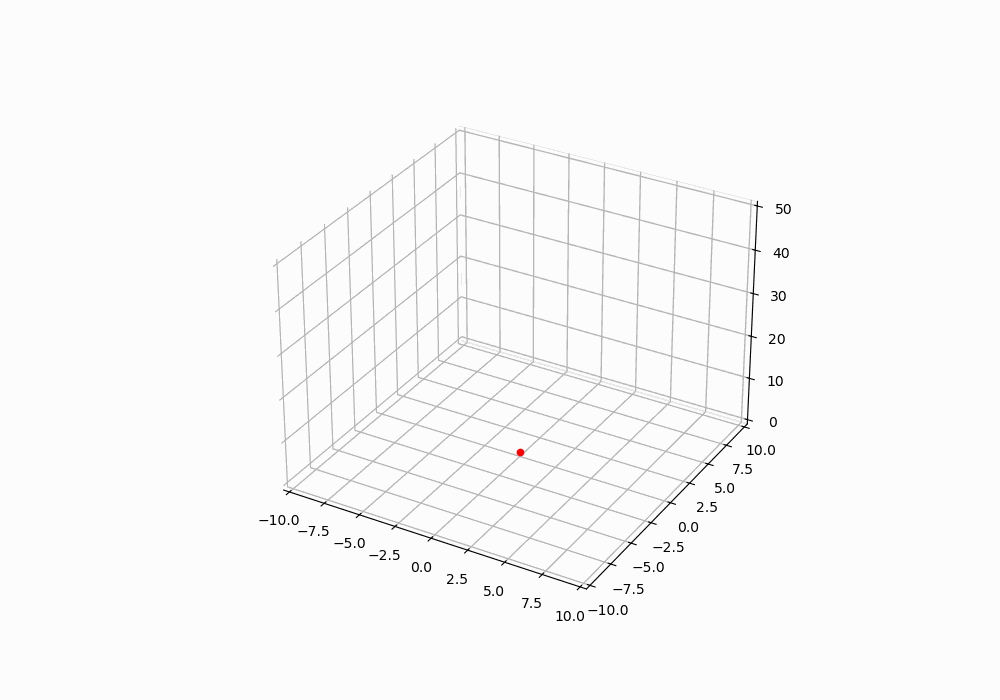

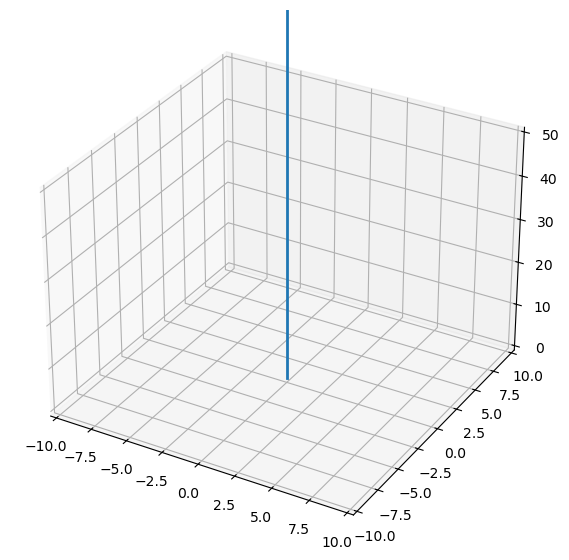

In [88]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from IPython.display import Image, display

# Parámetros
m = 1.0       # Masa del objeto en kg
g = 9.81      # Aceleración debida a la gravedad en m/s^2
k = 0.1       # Coeficiente de resistencia del aire en kg/m

# Definir la función que representa el sistema de ecuaciones en 3D
def model(v, t):
    vx, vy, vz = v
    dvxdt = - (k * vx) / m
    dvydt = - (k * vy) / m
    dvzdt = g - (k * vz) / m
    return [dvxdt, dvydt, dvzdt]

# Definir la función para calcular la trayectoria
def trajectory(v0, t):
    sol = odeint(model, v0, t)
    x = np.cumsum(sol[:, 0] * (t[1] - t[0]))
    y = np.cumsum(sol[:, 1] * (t[1] - t[0]))
    z = np.cumsum(sol[:, 2] * (t[1] - t[0]))
    return x, y, z

# Condiciones iniciales
v0 = [0.0, 0.0, 0.0]  # Velocidades iniciales en m/s
t = np.linspace(0, 10, 500)  # Tiempo en segundos

# Calcular la trayectoria
x, y, z = trajectory(v0, t)

# Configurar la visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Inicializar la animación
scat = ax.scatter([], [], [], c='r', marker='o')
line, = ax.plot([], [], [], lw=2)

def init():
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([0, 50])
    return scat, line

def update(frame):
    scat._offsets3d = (x[frame:frame+1], y[frame:frame+1], z[frame:frame+1])
    line.set_data(x[:frame], y[:frame])
    line.set_3d_properties(z[:frame])
    return scat, line

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=50)

# Guardar la animación como un archivo GIF
gif_path = 'animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=20))

# Mostrar el archivo GIF en el notebook
display(Image(filename=gif_path))


**Conclusiones**

La simulación demuestra claramente el impacto significativo de la resistencia del aire en el movimiento de un objeto en caída libre. A diferencia del modelo sin resistencia, la presencia de resistencia ralentiza la caída del objeto y altera su trayectoria, mostrando cómo la resistencia del aire introduce una desaceleración en las tres dimensiones del movimiento.

La animación en 3D proporciona una representación visual detallada de la trayectoria del objeto. A medida que el objeto cae, la resistencia del aire provoca una desviación en la trayectoria, que se refleja en la animación mostrando una curva en lugar de una caída vertical recta.

La resistencia del aire actúa en sentido opuesto al movimiento del objeto, reduciendo gradualmente su velocidad en todas las direcciones. Este efecto es más evidente a medida que el objeto desciende, con la velocidad alcanzando un valor terminal en el que la fuerza de resistencia equilibra la fuerza de gravedad.

Este modelo puede extenderse para incluir otros factores como la variación de la resistencia del aire con la velocidad o la inclusión de fuerzas adicionales como el viento. Además, la simulación puede ser útil en la predicción del comportamiento de objetos en caída libre en diferentes entornos atmosféricos y condiciones de resistencia.

La simulación 3D proporciona una herramienta educativa efectiva para comprender los efectos de la resistencia del aire en el movimiento de un objeto. La visualización interactiva permite a los usuarios observar en tiempo real cómo las variables afectan la caída y el comportamiento del objeto.